In [1]:
import pandas as pd
import matplotlib.pyplot as plt


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_95701/104540284.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")


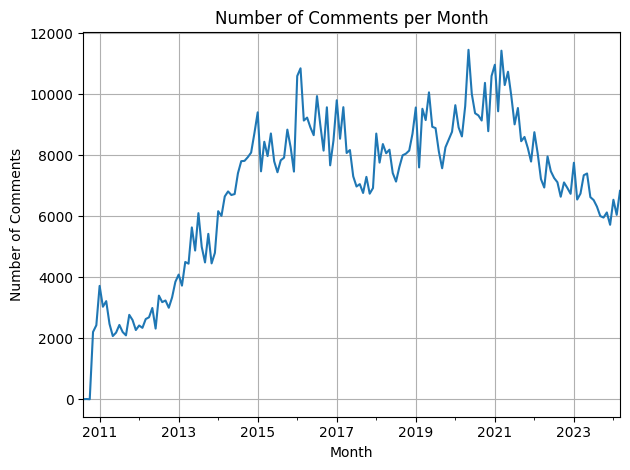

In [2]:
df = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")
df['CreationDate'] = pd.to_datetime(df['CreationDate'])
df.set_index('CreationDate').resample('M').size().plot()

plt.title("Number of Comments per Month")
plt.xlabel("Month")
plt.ylabel("Number of Comments")
plt.grid(True)
plt.tight_layout()
plt.show()

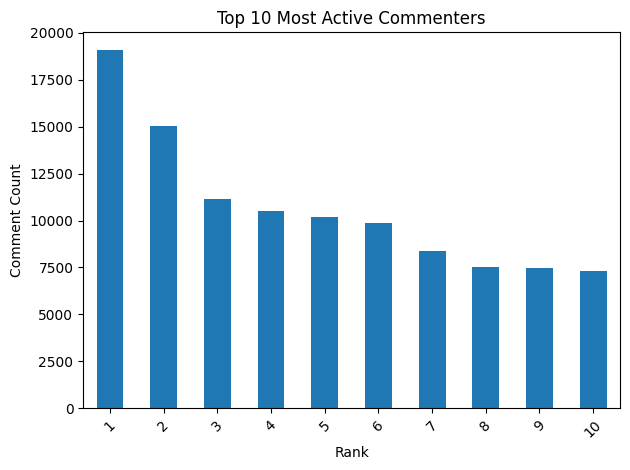

In [14]:
counts = df['UserId'].value_counts().head(10)
counts.plot(kind='bar')
plt.title("Top 10 Most Active Commenters")
plt.xlabel("Rank")
plt.xticks(ticks=range(len(counts)), labels=range(1, len(counts)+1), rotation=45)
plt.ylabel("Comment Count")
plt.xticks(range(len(counts)), range(1, len(counts)+1))
plt.tight_layout()
plt.show()

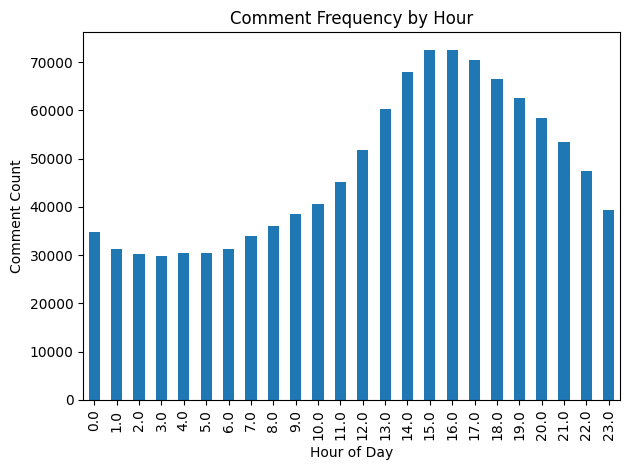

In [15]:
df['Hour'] = df['CreationDate'].dt.hour
df['Hour'].value_counts().sort_index().plot(kind='bar')
plt.title("Comment Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Comment Count")
plt.tight_layout()
plt.show()

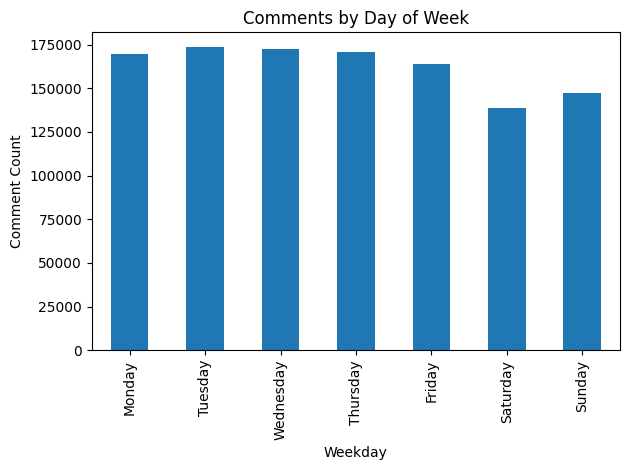

In [16]:
df['Weekday'] = df['CreationDate'].dt.day_name()
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

df['Weekday'].value_counts().reindex(weekday_order).plot(kind='bar')
plt.title("Comments by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Comment Count")
plt.tight_layout()
plt.show()

/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_93406/1478244922.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")


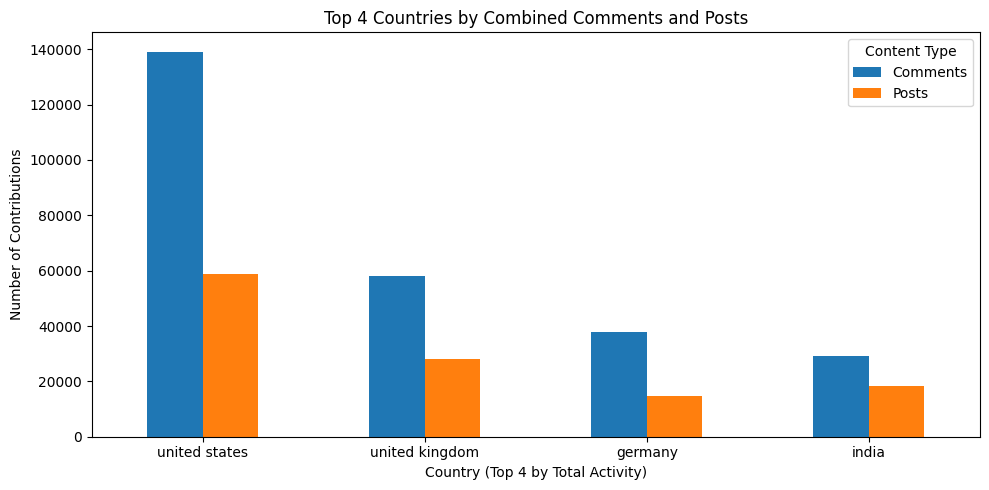

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")
posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv")
users = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/UsersWithSentimentAndCountry.csv")

# Merge comments and posts with user country
comments_merged = comments.merge(users[["Id", "LocationCountry"]], left_on="UserId", right_on="Id", how="left")
posts_merged = posts.merge(users[["Id", "LocationCountry"]], left_on="OwnerUserId", right_on="Id", how="left")

# Count comments and posts per country
comment_counts = comments_merged["LocationCountry"].value_counts()
post_counts = posts_merged["LocationCountry"].value_counts()

# Get top 4 countries by total activity
total = (comment_counts + post_counts).sort_values(ascending=False)
top5 = total.head(4).index

# Build dataframe
data = pd.DataFrame({
    "Comments": comment_counts[top5],
    "Posts": post_counts[top5]
})

# Plot
# Plot
ax = data.plot(kind="bar", figsize=(10, 5))
plt.title("Top 4 Countries by Combined Comments and Posts")
plt.xlabel("Country (Top 4 by Total Activity)")
plt.ylabel("Number of Contributions")
plt.xticks(rotation=0)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


In [55]:
top_greek_users = posts_merged[posts_merged["LocationCountry"] == "greece"]["OwnerUserId"].value_counts().head(10)
print(top_greek_users)


OwnerUserId
1492.0      6703
44176.0      159
150182.0      35
15873.0       27
66150.0       26
30004.0       23
137899.0      20
157506.0      19
260355.0      10
27389.0       10
Name: count, dtype: int64


# Comments and posts

In [17]:
comments = pd.read_csv("../data/Comments.csv")
posts = pd.read_csv("../data/Posts.csv")

/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_9362/1566334969.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("../data/Comments.csv")


In [18]:
merged = comments.merge(posts, left_on='PostId', right_on='Id', how='left')


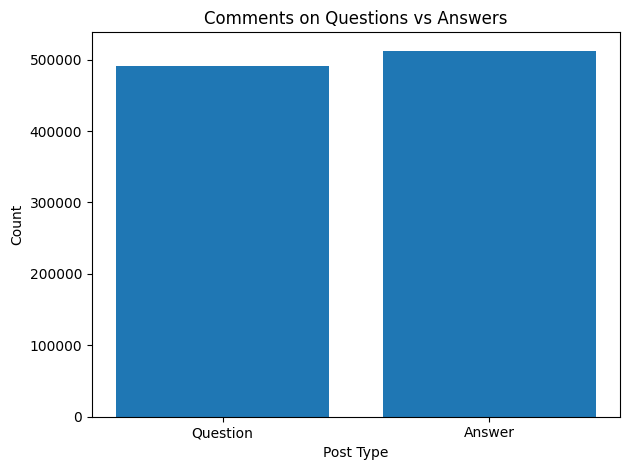

In [19]:
# Filter only PostTypeId 1 (question) and 2 (answer)
filtered = merged[merged["PostTypeId"].isin([1, 2])]
counts = filtered["PostTypeId"].value_counts().sort_index()

# Map PostTypeId to labels
labels = {1: "Question", 2: "Answer"}

# Plot
plt.figure()
plt.bar([labels[i] for i in counts.index], counts.values)
plt.title("Comments on Questions vs Answers")
plt.xlabel("Post Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_9362/3701458634.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv("../data/Comments.csv")


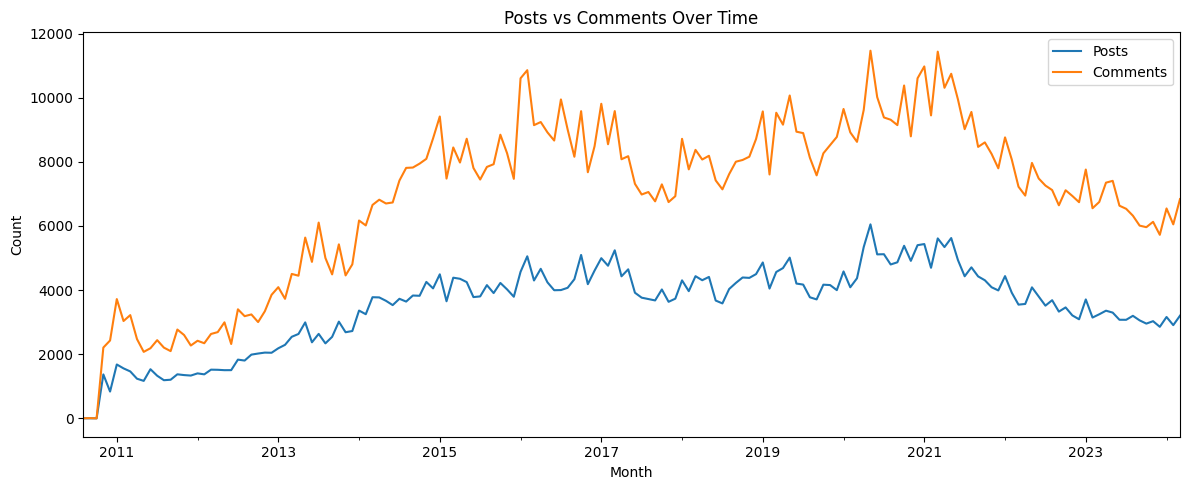

In [23]:
# Assuming df_posts and df_comments with 'CreationDate'
df_comments = pd.read_csv("../data/Comments.csv")
df_posts = pd.read_csv("../data/Posts.csv")
df_posts['CreationDate'] = pd.to_datetime(df_posts['CreationDate'])
df_comments['CreationDate'] = pd.to_datetime(df_comments['CreationDate'])

posts_per_month = df_posts.set_index('CreationDate').resample('M').size()
comments_per_month = df_comments.set_index('CreationDate').resample('M').size()

plt.figure(figsize=(12, 5))
posts_per_month.plot(label='Posts')
comments_per_month.plot(label='Comments')
plt.legend()
plt.title("Posts vs Comments Over Time")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


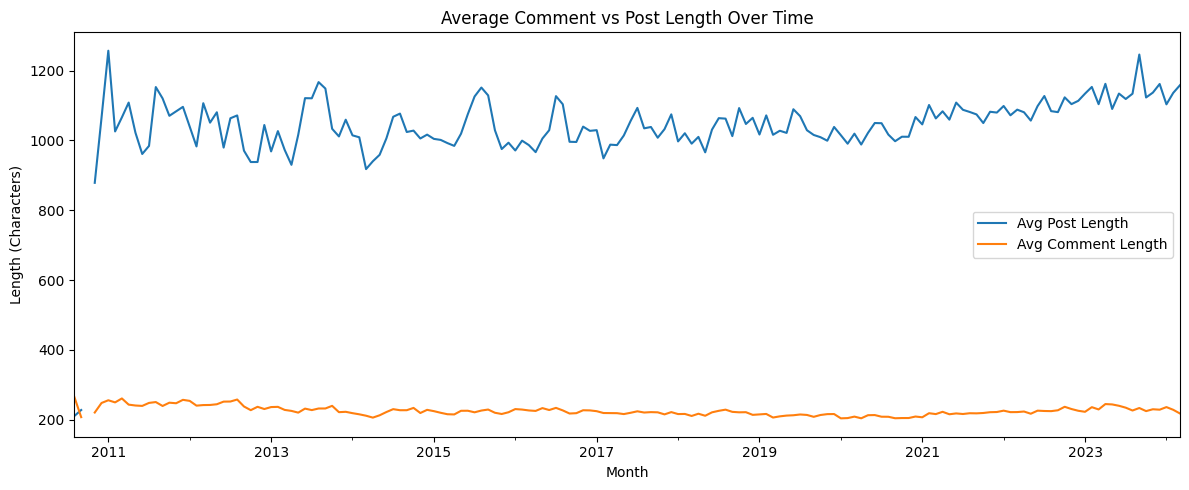

In [29]:
import matplotlib.pyplot as plt

# Convert to datetime
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_comments["CreationDate"] = pd.to_datetime(df_comments["CreationDate"])

# Compute text lengths
df_posts["PostLength"] = df_posts["Body"].str.len()
df_comments["CommentLength"] = df_comments["Text"].str.len()

# Resample to monthly averages
post_length_avg = df_posts.set_index("CreationDate")["PostLength"].resample("M").mean()
comment_length_avg = df_comments.set_index("CreationDate")["CommentLength"].resample("M").mean()

# Plot
plt.figure(figsize=(12, 5))
post_length_avg.plot(label="Avg Post Length")
comment_length_avg.plot(label="Avg Comment Length")
plt.title("Average Comment vs Post Length Over Time")
plt.xlabel("Month")
plt.ylabel("Length (Characters)")
plt.legend()
plt.tight_layout()
plt.show()


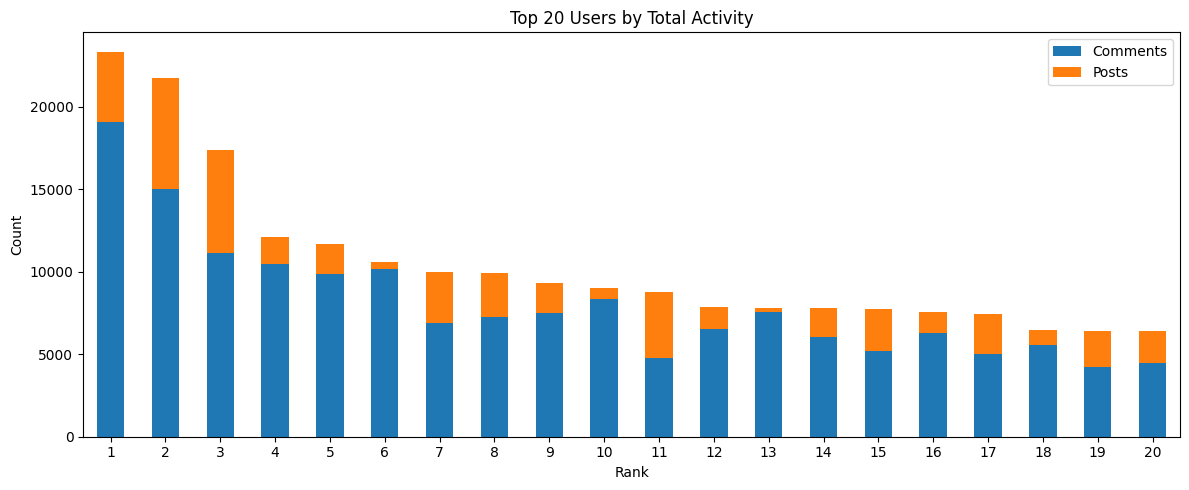

In [40]:
# Count comments and posts per user
top_commenters = df_comments["UserId"].value_counts()
top_posters = df_posts["OwnerUserId"].value_counts()

# Merge
activity = pd.DataFrame({
    "Comments": top_commenters,
    "Posts": top_posters
}).fillna(0)

# Top 20 by total activity
activity["Total"] = activity["Comments"] + activity["Posts"]
top_users = activity.sort_values("Total", ascending=False).head(20)

# Plot
top_users[["Comments", "Posts"]].plot(
    kind="bar", stacked=True, figsize=(12, 5)
)
plt.xticks(ticks=range(20), labels=[i+1 for i in range(20)], rotation=0)
plt.title("Top 20 Users by Total Activity")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# top5  during month and days


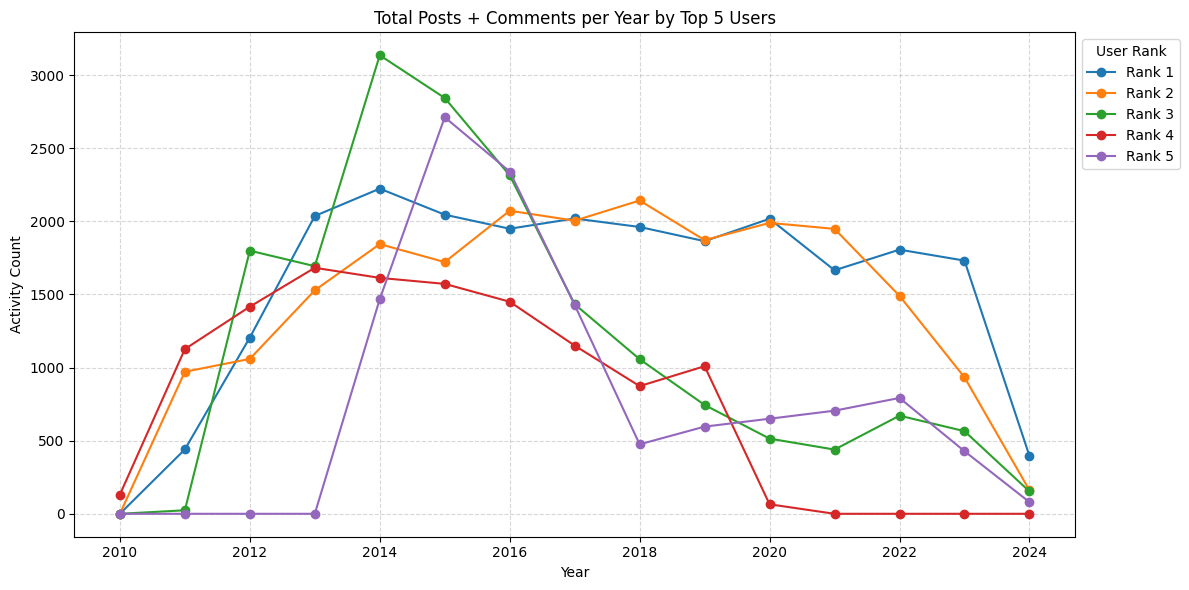

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv", low_memory=False)
df_posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv", low_memory=False)

# Identify top 5 most active users
top_commenters = df_comments["UserId"].value_counts()
top_posters = df_posts["OwnerUserId"].value_counts()
activity = pd.DataFrame({"Comments": top_commenters, "Posts": top_posters}).fillna(0)
activity["Total"] = activity["Comments"] + activity["Posts"]
top5_ids = activity.sort_values("Total", ascending=False).head(5).index

# Ensure datetime
df_comments["CreationDate"] = pd.to_datetime(df_comments["CreationDate"])
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])

# Filter and unify structure
comments_top5 = df_comments[df_comments["UserId"].isin(top5_ids)].copy()
posts_top5 = df_posts[df_posts["OwnerUserId"].isin(top5_ids)].copy()
comments_top5["UserId"] = comments_top5["UserId"].astype(int)
posts_top5["UserId"] = posts_top5["OwnerUserId"].astype(int)
comments_top5["Type"] = "Comment"
posts_top5["Type"] = "Post"
comments_clean = comments_top5[["UserId", "CreationDate", "Type"]]
posts_clean = posts_top5[["UserId", "CreationDate", "Type"]]
combined = pd.concat([comments_clean, posts_clean])

# Add month and weekday columns
combined["Month"] = combined["CreationDate"].dt.to_period("M").astype(str)
combined["Weekday"] = combined["CreationDate"].dt.day_name()

import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv", low_memory=False)
df_comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv", low_memory=False)

# Ensure datetime
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_comments["CreationDate"] = pd.to_datetime(df_comments["CreationDate"])

# Top 5 users by total activity
post_counts = df_posts["OwnerUserId"].value_counts()
comment_counts = df_comments["UserId"].value_counts()
total_counts = (post_counts + comment_counts).sort_values(ascending=False)
top_users = total_counts.head(5).index

# Filter and label
df_posts = df_posts[df_posts["OwnerUserId"].isin(top_users)].copy()
df_posts["UserId"] = df_posts["OwnerUserId"]
df_comments = df_comments[df_comments["UserId"].isin(top_users)].copy()

# Add year
df_posts["Year"] = df_posts["CreationDate"].dt.year
df_comments["Year"] = df_comments["CreationDate"].dt.year

# Count per year
post_yearly = df_posts.groupby(["UserId", "Year"]).size()
comment_yearly = df_comments.groupby(["UserId", "Year"]).size()

# Combine
yearly_total = (post_yearly + comment_yearly).unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for i, uid in enumerate(top_users):
    plt.plot(yearly_total.columns, yearly_total.loc[uid], marker="o", label=f"Rank {i+1}")

plt.title("Total Posts + Comments per Year by Top 5 Users")
plt.xlabel("Year")
plt.ylabel("Activity Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="User Rank", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


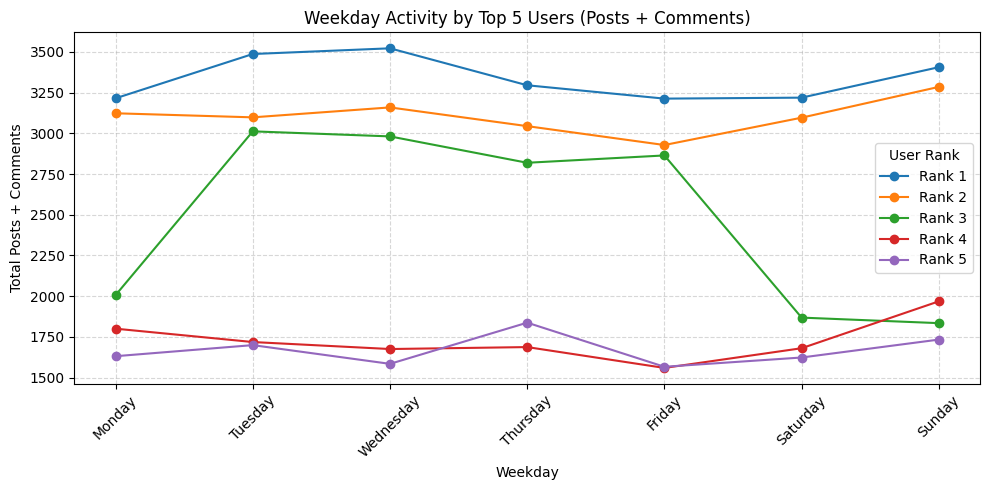

In [62]:
# ===== Combined Weekday Activity Plot =====
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts = (
    combined.groupby(["UserId", "Weekday"])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=weekday_order)
)

weekday_counts = weekday_counts.loc[top5_ids]

# Line plot for weekday activity
plt.figure(figsize=(10, 5))

for i, uid in enumerate(weekday_counts.index):
    plt.plot(weekday_counts.columns, weekday_counts.loc[uid], marker="o", label=f"Rank {i+1}")

plt.title("Weekday Activity by Top 5 Users (Posts + Comments)")
plt.xlabel("Weekday")
plt.ylabel("Total Posts + Comments")
plt.xticks(rotation=45)
plt.legend(title="User Rank")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()



In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df_posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv", low_memory=False)
df_comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv", low_memory=False)

# Parse dates
df_posts["CreationDate"] = pd.to_datetime(df_posts["CreationDate"])
df_comments["CreationDate"] = pd.to_datetime(df_comments["CreationDate"])

# Identify top 5 users by total activity
post_counts = df_posts["OwnerUserId"].value_counts()
comment_counts = df_comments["UserId"].value_counts()
total_activity = (post_counts + comment_counts).sort_values(ascending=False)
top5_ids = total_activity.head(5).index

# Filter to top 5
df_posts = df_posts[df_posts["OwnerUserId"].isin(top5_ids)].copy()
df_comments = df_comments[df_comments["UserId"].isin(top5_ids)].copy()

# Add UserId column to posts to match comments
df_posts["UserId"] = df_posts["OwnerUserId"]

# Add Month column
df_posts["Month"] = df_posts["CreationDate"].dt.month_name()
df_comments["Month"] = df_comments["CreationDate"].dt.month_name()

# Consistent month order
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]



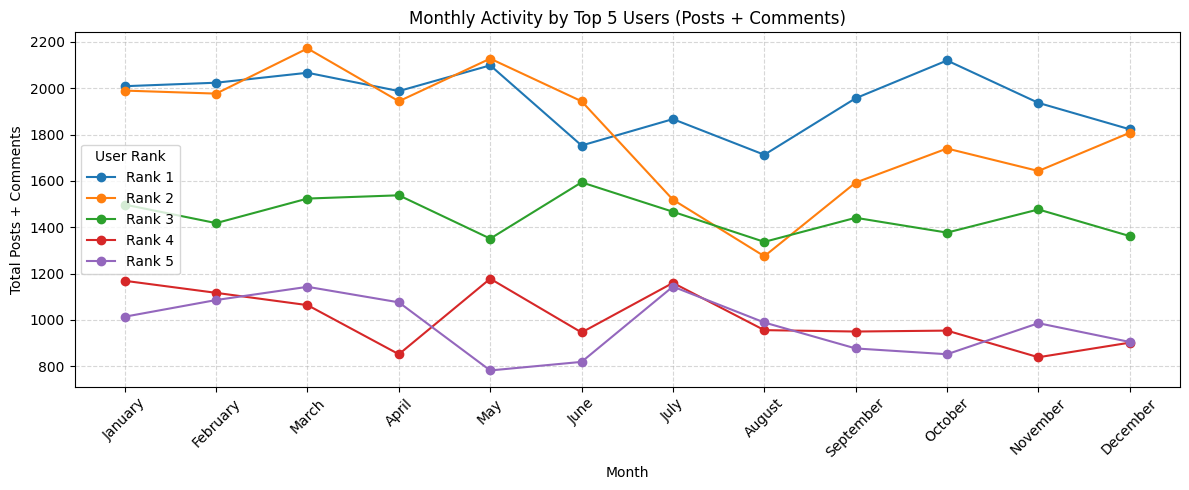

In [40]:
# Line plot for each user across months
plt.figure(figsize=(12, 5))

for i, col in enumerate(activity_matrix.columns):
    plt.plot(activity_matrix.index, activity_matrix[col], marker="o", label=col)

plt.title("Monthly Activity by Top 5 Users (Posts + Comments)")
plt.xlabel("Month")
plt.ylabel("Total Posts + Comments")
plt.xticks(rotation=45)
plt.legend(title="User Rank")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_16636/3083585658.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")


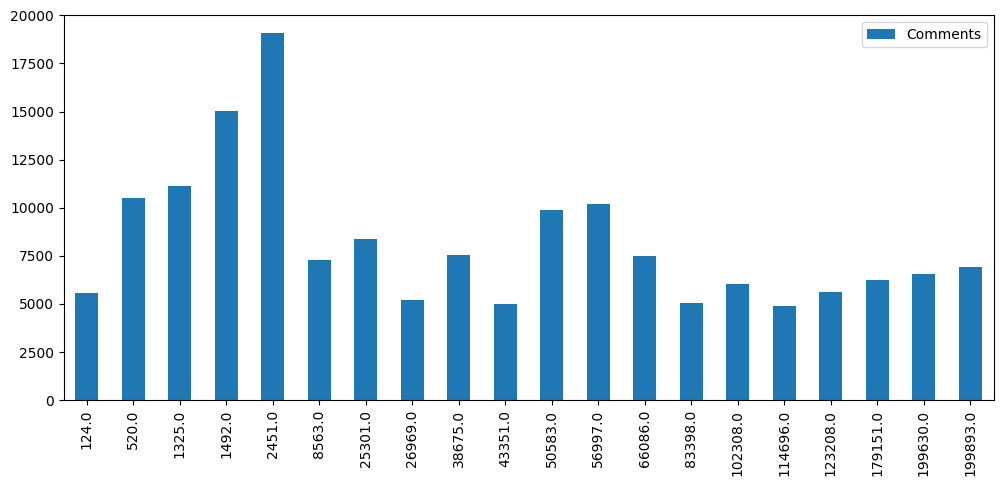

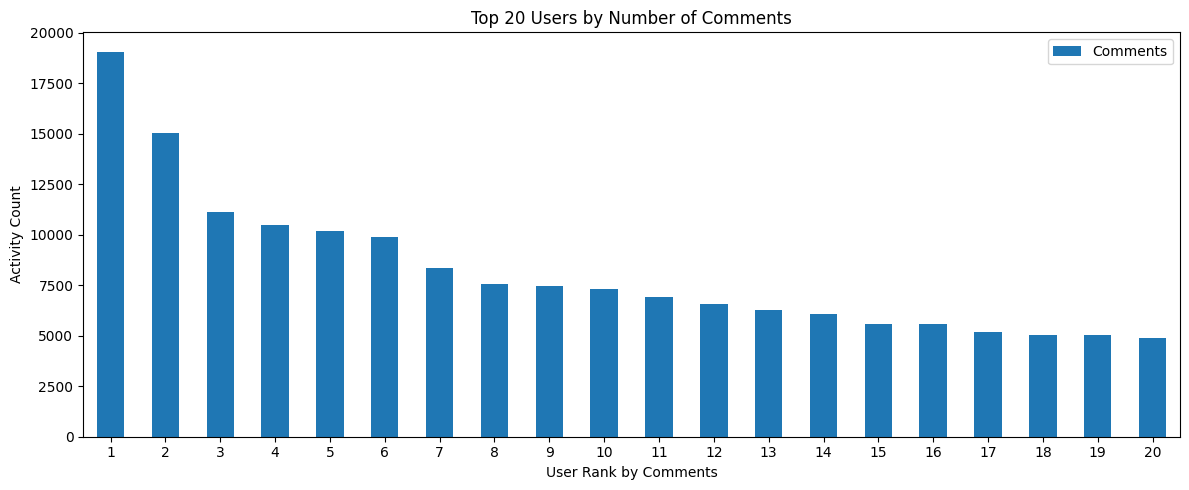

In [8]:
# Count user activity
df_comments = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Comments.csv")
df_posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv")
top_commenters = df_comments["UserId"].value_counts().head(20)
top_user_ids = top_commenters.index
top_posters = df_posts[df_posts["OwnerUserId"].isin(top_user_ids)]["OwnerUserId"].value_counts()
# Merge and filter to top commenters only
activity = pd.DataFrame({
    "Comments": top_commenters,
    "Posts": top_posters
}).fillna(0)
top_posters = df_posts[df_posts["OwnerUserId"].isin(top_user_ids)]["OwnerUserId"].value_counts()
# Plot
activity[["Comments"]].plot(
    kind="bar", figsize=(12, 5)
)
# Sort by comment count
activity_sorted = activity.sort_values("Comments", ascending=False)

# Plot
activity_sorted[["Comments"]].plot(
    kind="bar", figsize=(12, 5)
)
plt.xticks(ticks=range(20), labels=[i+1 for i in range(20)], rotation=0)
plt.title("Top 20 Users by Number of Comments")
plt.xlabel("User Rank by Comments")
plt.ylabel("Activity Count")
plt.tight_layout()
plt.show()

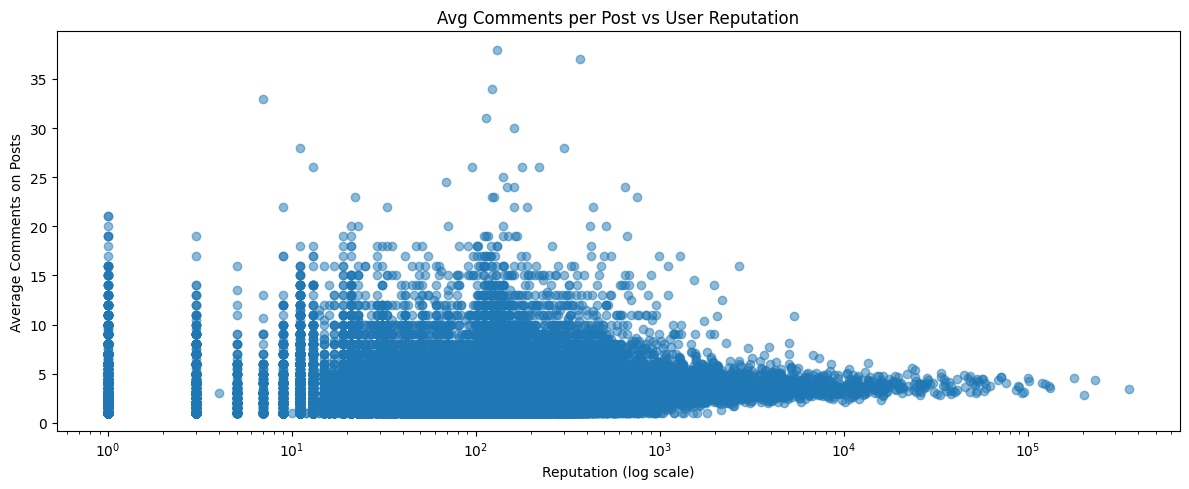

In [14]:
# Count comments per PostId
comment_counts = df_comments["PostId"].value_counts()

# Map each PostId to its OwnerUserId (from df_posts)
post_owner = df_posts[["Id", "OwnerUserId"]].set_index("Id")
comment_counts = comment_counts.to_frame("NumComments").join(post_owner, how="left")

# Group by user → average number of comments on their posts
avg_comments_per_user = comment_counts.groupby("OwnerUserId")["NumComments"].mean()

# Merge with reputation
df_users = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Users.csv", low_memory=False)
reputation = df_users[["Id", "Reputation"]].drop_duplicates().set_index("Id")
merged = avg_comments_per_user.to_frame("AvgCommentsOnPosts").join(reputation, how="inner")

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.scatter(merged["Reputation"], merged["AvgCommentsOnPosts"], alpha=0.5)
plt.xscale("log")
plt.title("Avg Comments per Post vs User Reputation")
plt.xlabel("Reputation (log scale)")
plt.ylabel("Average Comments on Posts")
plt.tight_layout()
plt.show()


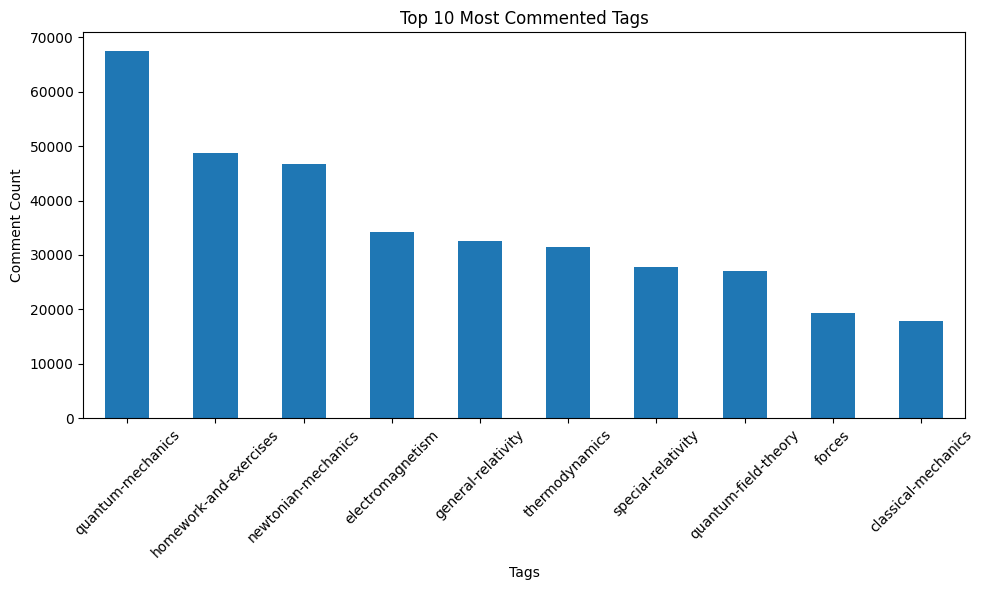

In [61]:
# Clean and count tags
tag_counts = (
    merged['Tags']
    .dropna()
    .str.replace('|', ' ', regex=False)    
    .str.split()
    .explode()
    .str.strip()
    .replace('', pd.NA)
    .dropna()
    .value_counts()
    .head(10)
)

# Plot using matplotlib
plt.figure(figsize=(10, 6))
tag_counts.plot(kind='bar')
plt.title("Top 10 Most Commented Tags")
plt.xlabel("Tags")
plt.ylabel("Comment Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
merged = comments.merge(posts, left_on='PostId', right_on='Id', how='left')

# Rename columns for clarity
merged = merged.rename(columns={
    'Score_x': 'CommentScore',
    'Score_y': 'PostScore',
    'CreationDate_x': 'CommentCreationDate',
    'CreationDate_y': 'PostCreationDate'
})
print(comments.columns)
print(posts.columns)

post_scores = merged.groupby('PostId')['PostScore'].first()
summary = post_scores.describe()
print(merged.columns)

print(summary)

Index(['Id', 'PostId', 'Score', 'Text', 'CreationDate', 'UserId',
       'UserDisplayName'],
      dtype='object')
Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'ContentLicense', 'ParentId', 'OwnerDisplayName', 'ClosedDate',
       'LastEditorDisplayName', 'CommunityOwnedDate', 'FavoriteCount'],
      dtype='object')
Index(['Id_x', 'PostId', 'CommentScore', 'Text', 'CommentCreationDate',
       'UserId', 'UserDisplayName', 'Id_y', 'PostTypeId', 'AcceptedAnswerId',
       'PostCreationDate', 'PostScore', 'ViewCount', 'Body', 'OwnerUserId',
       'LastEditorUserId', 'LastEditDate', 'LastActivityDate', 'Title', 'Tags',
       'AnswerCount', 'CommentCount', 'ContentLicense', 'ParentId',
       'OwnerDisplayName', 'ClosedDate', 'LastEditorDisplayName',
       'CommunityOwnedDate', 'FavoriteCount'],
      d

/var/folders/7k/0ysh65352j9bnvtmhpr3kcs00000gn/T/ipykernel_9362/1104144946.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv("../data/Comments.csv")


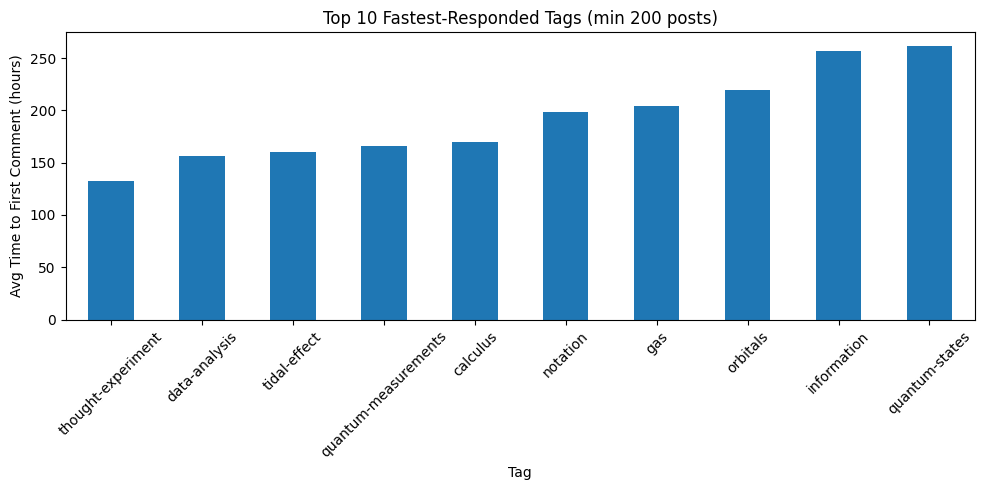

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
comments = pd.read_csv("../data/Comments.csv")
posts    = pd.read_csv("../data/Posts.csv")

# 2. Merge
merged = comments.merge(
    posts,
    left_on='PostId',
    right_on='Id',
    how='left',
    suffixes=('_comment', '_post')
)

# 3. Rename columns
merged = merged.rename(columns={
    'Id_comment': 'CommentId',
    'PostId':      'CommentPostId',
    'Id_post':     'PostId',
    'CreationDate_comment': 'CommentCreationDate',
    'CreationDate_post':    'PostCreationDate',
    'Score_comment':        'CommentScore',
    'Score_post':           'PostScore',
})

# 4. To datetime
merged['CommentCreationDate'] = pd.to_datetime(merged['CommentCreationDate'])
merged['PostCreationDate']    = pd.to_datetime(merged['PostCreationDate'])

# 5. First comment per post
first_comments = (
    merged
      .sort_values('CommentCreationDate')
      .groupby('PostId', as_index=False)
      .first()
)

# 6. Response time in hours
first_comments['ResponseTimeHours'] = (
    (first_comments['CommentCreationDate'] - first_comments['PostCreationDate'])
     .dt.total_seconds() / 3600
)

# 7. Filter negatives
first_comments = first_comments[first_comments['ResponseTimeHours'] >= 0]

# 8. Explode tags
exploded = (
    first_comments
      .dropna(subset=['Tags'])
      .assign(TagList=lambda df: df['Tags'].str.strip('|').str.split('|'))
      .explode('TagList')
)

# 9. Remove tags with too few posts
min_posts = 200

tag_counts = exploded['TagList'].value_counts()
valid_tags = tag_counts[tag_counts >= min_posts].index
filtered = exploded[exploded['TagList'].isin(valid_tags)]

# 10. Compute average response time per tag
tag_times = (
    filtered
      .groupby('TagList')['ResponseTimeHours']
      .mean()
      .sort_values()
      .head(10)
)

# 11. Plot
plt.figure(figsize=(10, 5))
tag_times.plot(kind='bar')
plt.title(f"Top 10 Fastest-Responded Tags (min {min_posts} posts)")
plt.xlabel("Tag")
plt.ylabel("Avg Time to First Comment (hours)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# TAGS

In [6]:
import pandas as pd
import xml.etree.ElementTree as ET

# Parse Tags.xml and save to DataFrame
tree = ET.parse("/Users/adilshamji/Documents/25-Data-mining-lab/Datasets/physics.stackexchange.com/Tags.xml")
root = tree.getroot()

tag_data = []
for row in root:
    tag_data.append({
        "Id": int(row.attrib.get("Id", 0)),
        "TagName": row.attrib.get("TagName", ""),
        "Count": int(row.attrib.get("Count", 0)),
        "ExcerptPostId": int(row.attrib["ExcerptPostId"]) if "ExcerptPostId" in row.attrib else None,
        "WikiPostId": int(row.attrib["WikiPostId"]) if "WikiPostId" in row.attrib else None
    })

df_tags = pd.DataFrame(tag_data)
df_tags.to_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Tags.csv", index=False)
print(df_tags.head())


   Id             TagName  Count  ExcerptPostId  WikiPostId
0   1        quantum-spin   2775        19257.0     19256.0
1   2           subatomic    174        76305.0     76304.0
2   3       string-theory   2699        13887.0     13886.0
3   4    particle-physics   6567         9930.0      9929.0
4   5  general-relativity  13760         9977.0      9976.0


In [24]:
import pandas as pd
import re
import xml.etree.ElementTree as ET
from collections import Counter
from nltk.corpus import stopwords
import nltk

# nltk.download('stopwords')  # Uncomment if you need
stop_words = set(stopwords.words("english"))

def extract_tags(tag_string):
    return re.findall(r"<(.*?)>", str(tag_string))

def tokenize(text):
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(r"\\[a-zA-Z]+", " ", text)
    text = re.sub(r"http\S+", "", text)
    words = re.findall(r"\b\w+\b", text.lower())
    return [w for w in words if w not in stop_words and len(w) > 2]

# 1. Parse Tags.xml
tags = []
tree = ET.parse("/Users/adilshamji/Documents/25-Data-mining-lab/Datasets/physics.stackexchange.com/Tags.xml")
root = tree.getroot()
for row in root:
    tagname = row.attrib['TagName']
    count = int(row.attrib['Count'])
    tags.append((tagname, count))
tags_sorted = sorted(tags, key=lambda x: x[1], reverse=True)
top_tags = [tag for tag, _ in tags_sorted[:10]]

# 2. For each tag, get top 5 words from high-score posts
summary_rows = []
for tag in top_tags:
    has_tag = df_posts["Tags"].apply(lambda tags: tag in extract_tags(tags))
    tagged_posts = df_posts[has_tag & (df_posts["Score"] >= 10)]
    text = " ".join(tagged_posts["Body"].astype(str))
    words = tokenize(text)
    for word, count in Counter(words).most_common(7):
        summary_rows.append({"Tag": tag, "Word": word, "Count": count})

df_summary = pd.DataFrame(summary_rows)
print(df_summary)


Empty DataFrame
Columns: []
Index: []


In [5]:
# RELOAD THE DATASET TAGS
import pandas as pd
df_posts = pd.read_csv("/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Posts.csv")

csv_path = "/Users/adilshamji/Documents/25-Data-mining-lab/Data-Mining-Stackexchange/data/Tags.csv"
df_tags = pd.read_csv(csv_path)
print("Reloaded tags. Example:")
print(df_tags.head())


Reloaded tags. Example:
   Id             TagName  Count  ExcerptPostId  WikiPostId
0   1        quantum-spin   2775        19257.0     19256.0
1   2           subatomic    174        76305.0     76304.0
2   3       string-theory   2699        13887.0     13886.0
3   4    particle-physics   6567         9930.0      9929.0
4   5  general-relativity  13760         9977.0      9976.0


In [16]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
custom_stopwords = {"would", "could", "also", "using", "one", "get", "like", "question", "find"}
stop_words.update(custom_stopwords)

def extract_tags(tag_string):
    tags = str(tag_string).strip("|").split("|")
    return [t for t in tags if t]

def tokenize(text):
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"\\[a-zA-Z]+", " ", text)  # Remove LaTeX commands
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    words = re.findall(r"\b\w+\b", text.lower())
    return [w for w in words if w not in stop_words and len(w) > 2]

# 1. Get top 10 tags by global usage (ignoring score)
top_tags = df_tags.sort_values("Count", ascending=False).head(5)["TagName"].tolist()
print(top_tags)
# 2. For each tag, get top 5 words from ALL posts with that tag
summary_rows = []
for tag in top_tags:
    has_tag = df_posts["Tags"].apply(lambda tags: tag in extract_tags(tags))
    tagged_posts = df_posts[has_tag]
    text = " ".join(tagged_posts["Body"].astype(str))
    words = tokenize(text)
    for word, count in Counter(words).most_common(6):
        summary_rows.append({"Tag": tag, "Word": word, "Count": count})

df_summary = pd.DataFrame(summary_rows)
for tag in df_summary["Tag"].unique():
    display(df_summary[df_summary["Tag"] == tag])


['quantum-mechanics', 'homework-and-exercises', 'newtonian-mechanics', 'electromagnetism', 'thermodynamics']


,Tag,Word,Count
0,quantum-mechanics,quantum,22781
1,quantum-mechanics,state,19808
2,quantum-mechanics,energy,15199
3,quantum-mechanics,equation,13820
4,quantum-mechanics,particle,12916
5,quantum-mechanics,time,12073


,Tag,Word,Count
6,homework-and-exercises,equation,11683
7,homework-and-exercises,force,9783
8,homework-and-exercises,problem,9159
9,homework-and-exercises,mass,9058
10,homework-and-exercises,energy,8708
11,homework-and-exercises,know,8140


,Tag,Word,Count
12,newtonian-mechanics,force,26609
13,newtonian-mechanics,mass,13935
14,newtonian-mechanics,velocity,11083
15,newtonian-mechanics,energy,11038
16,newtonian-mechanics,object,7255
17,newtonian-mechanics,acceleration,7223


,Tag,Word,Count
18,electromagnetism,field,26091
19,electromagnetism,magnetic,17091
20,electromagnetism,electric,10129
21,electromagnetism,current,10006
22,electromagnetism,charge,8696
23,electromagnetism,force,7673


,Tag,Word,Count
24,thermodynamics,energy,14347
25,thermodynamics,temperature,13720
26,thermodynamics,heat,12787
27,thermodynamics,system,8883
28,thermodynamics,gas,7289
29,thermodynamics,entropy,6592


In [31]:
def extract_tags(tag_string):
    if pd.isnull(tag_string):
        return []
    tags = str(tag_string).strip("|").split("|")
    return [t for t in tags if t]

print(extract_tags('|quantum-mechanics|particle-physics|angular-momentum|quantum-spin|'))

['quantum-mechanics', 'particle-physics', 'angular-momentum', 'quantum-spin']


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# 1. Set up stopwords
stop_words = set(stopwords.words("english"))
custom_stopwords = {"would", "could", "also", "using", "one", "get", "like", "question", "find"}
stop_words.update(custom_stopwords)

# 2. Functions
def extract_tags(tag_string):
    if pd.isnull(tag_string):
        return []
    tags = str(tag_string).strip("|").split("|")
    return [t for t in tags if t]

def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"\\[a-zA-Z]+", " ", text)  # Remove LaTeX commands
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    return text

# 3. Select top N tags
top_tags = df_tags.sort_values("Count", ascending=False).head(5)["TagName"].tolist()

# 4. Prepare cleaned documents for TF-IDF
tag_docs = []
valid_tags = []

for tag in top_tags:
    has_tag = df_posts["Tags"].apply(lambda tags: tag in extract_tags(tags))
    tagged_posts = df_posts[has_tag].copy()
    tagged_posts["CleanBody"] = tagged_posts["Body"].astype(str).apply(clean_text)
    text = " ".join(tagged_posts["CleanBody"])
    if text.strip():
        tag_docs.append(text)
        valid_tags.append(tag)

# 5. Run TF-IDF on cleaned text and store results in DataFrame
summary_rows = []

if tag_docs:
    vectorizer = TfidfVectorizer(stop_words=list(stop_words), max_features=5000)
    tfidf_matrix = vectorizer.fit_transform(tag_docs)
    feature_names = vectorizer.get_feature_names_out()
    for idx, tag in enumerate(valid_tags):
        row = tfidf_matrix[idx].toarray().flatten()
        top_indices = row.argsort()[-4:][::-1]
        for i in top_indices:
            summary_rows.append({
                "Tag": tag,
                "Word": feature_names[i],
                "TFIDF": row[i]
            })
    df_tag_signature_words = pd.DataFrame(summary_rows)
    display(df_tag_signature_words)
else:
    print("No non-empty documents for selected tags.")


,Tag,Word,TFIDF
0,quantum-mechanics,quantum,0.306203
1,quantum-mechanics,state,0.266242
2,quantum-mechanics,energy,0.204292
3,quantum-mechanics,equation,0.185757
4,quantum-mechanics,particle,0.173606
5,homework-and-exercises,equation,0.237832
6,homework-and-exercises,force,0.199153
7,homework-and-exercises,problem,0.186450
8,homework-and-exercises,mass,0.184394
9,homework-and-exercises,energy,0.177269


In [15]:
from tabulate import tabulate
print(tabulate(df_tag_signature_words, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════════════╤═════════════╤══════════╕
│ Tag                    │ Word        │    TFIDF │
╞════════════════════════╪═════════════╪══════════╡
│ quantum-mechanics      │ quantum     │ 0.306203 │
├────────────────────────┼─────────────┼──────────┤
│ quantum-mechanics      │ state       │ 0.266242 │
├────────────────────────┼─────────────┼──────────┤
│ quantum-mechanics      │ energy      │ 0.204292 │
├────────────────────────┼─────────────┼──────────┤
│ quantum-mechanics      │ equation    │ 0.185757 │
├────────────────────────┼─────────────┼──────────┤
│ quantum-mechanics      │ particle    │ 0.173606 │
├────────────────────────┼─────────────┼──────────┤
│ homework-and-exercises │ equation    │ 0.237832 │
├────────────────────────┼─────────────┼──────────┤
│ homework-and-exercises │ force       │ 0.199153 │
├────────────────────────┼─────────────┼──────────┤
│ homework-and-exercises │ problem     │ 0.18645  │
├────────────────────────┼─────────────┼──────────┤
│ homework-a